In [240]:
import pandas as pd
import matplotlib.pyplot as plt

In [241]:
songs = pd.read_csv('songs_normalize.csv')

In [242]:
songs.sample(8)

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
1809,XXXTENTACION,Moonlight,135090,True,2018,82,0.921,0.537,9,-5.723,0,0.0804,0.55600,0.004040,0.1020,0.711,128.009,hip hop
1592,Sigala,Easy Love,229813,False,2018,66,0.680,0.942,9,-4.208,1,0.0631,0.17500,0.001300,0.1170,0.647,123.976,"pop, Dance/Electronic"
757,Pretty Ricky,On the Hotline - Amended Version,242586,False,2007,57,0.704,0.854,10,-5.477,0,0.1830,0.01850,0.000000,0.1480,0.688,92.988,"hip hop, pop, R&B"
1193,P!nk,Raise Your Glass,202960,True,2010,76,0.700,0.709,7,-5.006,1,0.0838,0.00480,0.000000,0.0290,0.624,122.019,pop
908,Lady Gaga,LoveGame,216333,False,2008,69,0.894,0.678,6,-5.611,0,0.0523,0.00569,0.000002,0.3170,0.844,105.024,pop
1504,Major Lazer,Lean On (feat. MØ & DJ Snake),176561,False,2015,73,0.723,0.809,7,-3.081,0,0.0625,0.00346,0.001230,0.5650,0.274,98.007,"hip hop, pop, Dance/Electronic"
447,Snoop Dogg,Drop It Like It's Hot,266066,True,2004,39,0.892,0.628,1,-3.832,1,0.2160,0.16900,0.000000,0.1020,0.676,92.063,"hip hop, pop"
1376,Zedd,Clarity,271426,False,2012,0,0.523,0.780,8,-3.464,1,0.0753,0.03660,0.000000,0.0751,0.193,128.006,"hip hop, pop, Dance/Electronic"


In [243]:
songs.shape

(2000, 18)

#### Q1) Using groupby(), plot the number of songs that have been released each year. Please, use the kind='bar', xlabel=year and ylabel ='Count of songs' and the size of figure should be (12,8) ---- <font color='blue'> (15 points)</font>

<AxesSubplot: xlabel='year', ylabel='Count of songs'>

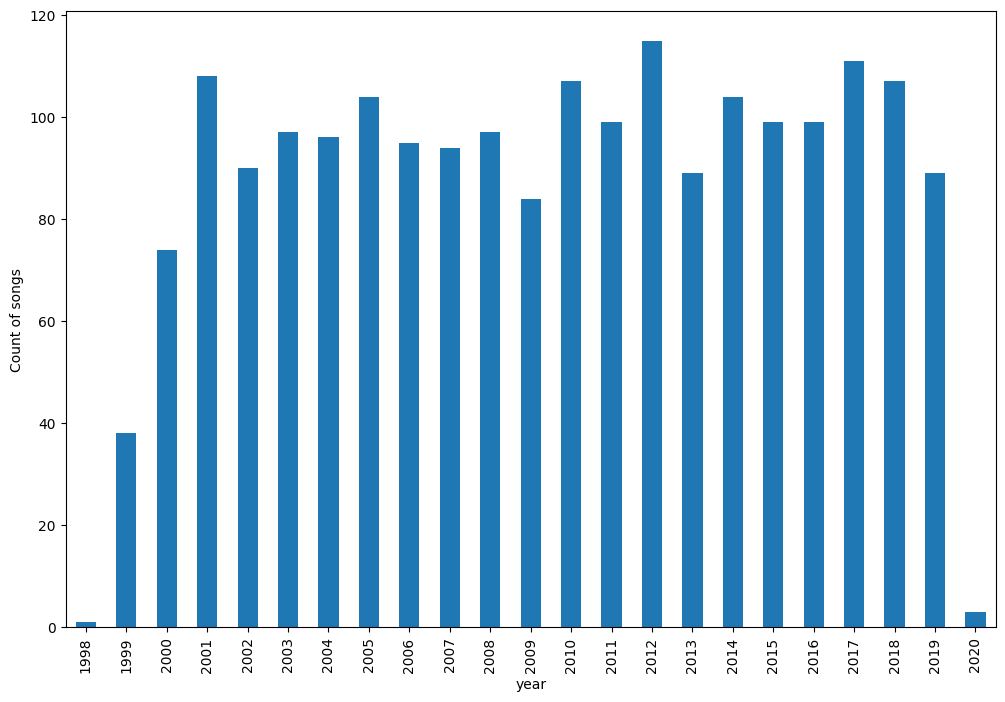

In [244]:
songs.year.value_counts().sort_index().plot(kind="bar", xlabel="year", ylabel="Count of songs", figsize=(12, 8))

<AxesSubplot: xlabel='year', ylabel='Count of songs'>

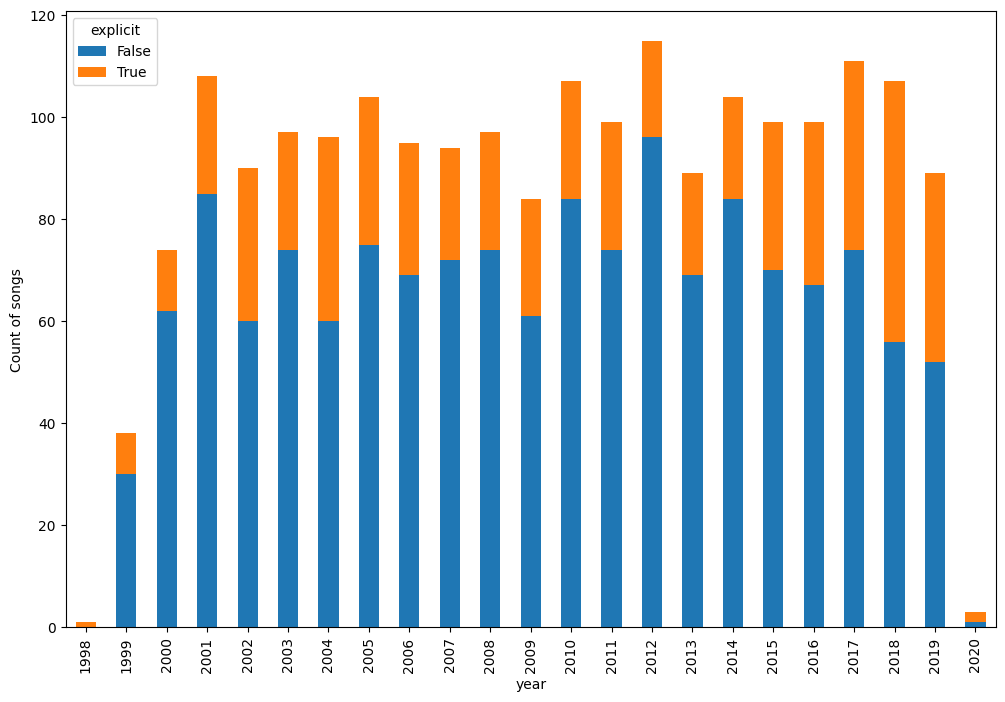

In [245]:
songs.groupby(["year", "explicit"]).size().unstack(fill_value=0).plot.bar(stacked=True, xlabel="year",
                                                                          ylabel="Count of songs", figsize=(12, 8))

#### Q2) Use groupby() to present how many songs does Rihanna have over years. <font color='blue'> (10 points)</font>

In [276]:
artist_rate_by_year = songs[['year','artist']]
artist_rate_by_year = artist_rate_by_year.groupby(['artist','year']).mean()

artist_rate_by_year.reset_index(inplace=True)

In [277]:
rihanna_popularity = artist_rate_by_year[artist_rate_by_year['artist'] == 'Rihanna']
rihanna_popularity

,artist,year
1072,Rihanna,2005
1073,Rihanna,2006
1074,Rihanna,2008
1075,Rihanna,2009
1076,Rihanna,2010
1077,Rihanna,2011
1078,Rihanna,2012
1079,Rihanna,2015
1080,Rihanna,2016


#### Q3) Use groupby() to  sort the number of artists released pop(only!) songs in 2011. <font color='blue'> (10 points)</font>

In [278]:
songs_by_genre = songs.groupby(['genre'])
songs_by_genre.get_group('pop')

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop
10,Gigi D'Agostino,L'Amour Toujours,238759,False,2011,1,0.617,0.728,7,-7.932,1,0.0292,0.0328,0.048200,0.3600,0.808,139.066,pop
11,Eiffel 65,Move Your Body - Gabry Ponte Original Radio Edit,268863,False,1999,56,0.745,0.958,7,-9.664,1,0.0287,0.0813,0.324000,0.5330,0.960,129.962,pop
12,Bomfunk MC's,Freestyler,306333,False,2000,55,0.822,0.922,11,-5.798,0,0.0989,0.0291,0.325000,0.2520,0.568,163.826,pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1985,Ed Sheeran,Cross Me (feat. Chance the Rapper & PnB Rock),206186,True,2019,64,0.746,0.787,4,-6.373,1,0.1200,0.2140,0.000000,0.0669,0.607,95.005,pop
1990,Sam Smith,How Do You Sleep?,202204,False,2019,73,0.477,0.682,1,-4.931,0,0.0925,0.1530,0.000000,0.0763,0.345,110.567,pop
1995,Jonas Brothers,Sucker,181026,False,2019,79,0.842,0.734,1,-5.065,0,0.0588,0.0427,0.000000,0.1060,0.952,137.958,pop
1996,Taylor Swift,Cruel Summer,178426,False,2019,78,0.552,0.702,9,-5.707,1,0.1570,0.1170,0.000021,0.1050,0.564,169.994,pop


In [279]:
songs_by_genre.filter(lambda x: x['year'].mean() > 2011)

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
14,Melanie C,Never Be The Same Again,294200,False,1999,61,0.689,0.685,3,-5.153,1,0.0478,0.09210,0.000000,0.1190,0.3980,160.067,"pop, Dance/Electronic"
24,Melanie C,I Turn To You,352173,False,1999,54,0.522,0.803,1,-5.825,1,0.0327,0.00117,0.001670,0.3100,0.0783,135.205,"pop, Dance/Electronic"
26,Darude,Sandstorm,225493,False,2001,69,0.528,0.965,11,-7.984,0,0.0465,0.14100,0.985000,0.0797,0.5870,136.065,"pop, Dance/Electronic"
28,Moloko,The Time Is Now,318280,False,2000,54,0.682,0.743,9,-10.644,0,0.1650,0.35000,0.000129,0.2770,0.5460,127.962,"pop, Dance/Electronic"
36,Kylie Minogue,Spinning Around,207866,False,2000,55,0.761,0.662,6,-7.645,0,0.0548,0.29200,0.000062,0.0956,0.6310,120.043,"pop, Dance/Electronic"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1986,Lauv,i'm so tired...,162582,False,2019,2,0.599,0.733,11,-7.058,1,0.2030,0.17600,0.000000,0.2420,0.5340,102.211,"pop, Dance/Electronic"
1989,Marshmello,One Thing Right,181823,False,2019,73,0.659,0.625,4,-2.253,1,0.0450,0.06440,0.000000,0.5820,0.4420,88.042,"pop, Dance/Electronic"
1991,NSG,Options,240081,True,2020,57,0.836,0.621,1,-4.684,0,0.0894,0.38900,0.000092,0.1040,0.7620,101.993,"World/Traditional, hip hop"
1993,Joel Corry,Sorry,188640,False,2019,63,0.744,0.790,8,-4.617,0,0.0562,0.05470,0.000802,0.3200,0.8470,125.002,"pop, Dance/Electronic"


#### Q5) List, in order by year, each of the genres in which Calvin Harris has released more than 1 songs. <font color='blue'> (15 points)</font>

In [280]:
calvin_harris_songs = songs[songs['artist'] == "Calvin Harris"]
calvin_harris_songs

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
745,Calvin Harris,Acceptable in the 80's,333680,False,2007,57,0.787,0.808,7,-5.454,1,0.0511,0.014300,0.257000,0.0466,0.942,127.990,"hip hop, pop, Dance/Electronic"
968,Calvin Harris,I'm Not Alone - Radio Edit,210973,False,2009,55,0.597,0.684,7,-6.614,1,0.0321,0.004810,0.105000,0.3170,0.435,130.990,"hip hop, pop, Dance/Electronic"
1169,Calvin Harris,Bounce (feat. Kelis) - Radio Edit,222186,False,2012,62,0.779,0.963,2,-2.125,0,0.0399,0.033400,0.493000,0.6640,0.759,127.941,"hip hop, pop, Dance/Electronic"
1244,Calvin Harris,Feel So Close - Radio Edit,206413,False,2012,79,0.707,0.924,7,-2.842,1,0.0310,0.000972,0.007030,0.2040,0.919,127.937,"hip hop, pop, Dance/Electronic"
1251,Calvin Harris,Let's Go (feat. Ne-Yo),232800,False,2012,66,0.710,0.882,4,-2.932,0,0.0595,0.007770,0.007710,0.2940,0.875,128.016,"hip hop, pop, Dance/Electronic"
1277,Calvin Harris,We'll Be Coming Back (feat. Example),234360,False,2012,62,0.596,0.952,7,-4.364,1,0.0873,0.001310,0.000000,0.5980,0.571,127.945,"hip hop, pop, Dance/Electronic"
1347,Calvin Harris,Drinking from the Bottle (feat. Tinie Tempah),240346,False,2012,61,0.665,0.886,9,-4.175,0,0.0514,0.046900,0.000062,0.0525,0.530,128.062,"hip hop, pop, Dance/Electronic"
1353,Calvin Harris,I Need Your Love (feat. Ellie Goulding),234506,False,2012,70,0.695,0.869,8,-5.066,1,0.0483,0.410000,0.000000,0.2370,0.580,124.989,"hip hop, pop, Dance/Electronic"
1359,Calvin Harris,Sweet Nothing (feat. Florence Welch),212560,False,2012,71,0.573,0.929,8,-3.942,0,0.1090,0.197000,0.000112,0.0567,0.582,127.934,"hip hop, pop, Dance/Electronic"
1369,Calvin Harris,Thinking About You (feat. Ayah Marar),247933,False,2012,65,0.725,0.874,0,-3.715,0,0.0396,0.002620,0.000412,0.0958,0.748,127.985,"hip hop, pop, Dance/Electronic"


In [281]:
calvin_harris_songs_order_by_year = calvin_harris_songs.sort_values(by=['year'], ascending=False)
calvin_harris_songs_order_by_year

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
1954,Calvin Harris,Giant (with Rag'n'Bone Man),229184,False,2019,73,0.807,0.887,1,-4.311,0,0.0361,0.016000,0.000503,0.0811,0.606,122.015,"hip hop, pop, Dance/Electronic"
1812,Calvin Harris,One Kiss (with Dua Lipa),214846,False,2018,81,0.791,0.862,9,-3.240,0,0.1100,0.037000,0.000022,0.0814,0.592,123.994,"hip hop, pop, Dance/Electronic"
1774,Calvin Harris,"Feels (feat. Pharrell Williams, Katy Perry & B...",223413,True,2017,79,0.893,0.745,11,-3.105,0,0.0571,0.064200,0.000000,0.0943,0.872,101.018,"hip hop, pop, Dance/Electronic"
1641,Calvin Harris,My Way,219159,False,2016,74,0.818,0.913,4,-3.060,0,0.0426,0.093000,0.000037,0.1610,0.536,119.986,"hip hop, pop, Dance/Electronic"
1633,Calvin Harris,This Is What You Came For (feat. Rihanna),222160,False,2016,79,0.631,0.927,9,-2.787,0,0.0332,0.199000,0.119000,0.1480,0.465,123.962,"hip hop, pop, Dance/Electronic"
1521,Calvin Harris,How Deep Is Your Love,212640,False,2015,76,0.738,0.868,11,-4.373,0,0.0731,0.039200,0.001690,0.3880,0.336,122.003,"hip hop, pop, Dance/Electronic"
1429,Calvin Harris,Blame (feat. John Newman),212960,False,2014,75,0.414,0.857,0,-4.078,0,0.0808,0.028700,0.005740,0.3430,0.348,128.024,"hip hop, pop, Dance/Electronic"
1507,Calvin Harris,Outside (feat. Ellie Goulding),227266,False,2014,78,0.646,0.823,2,-4.123,0,0.0394,0.213000,0.000000,0.3220,0.418,128.035,"hip hop, pop, Dance/Electronic"
1434,Calvin Harris,Summer,224506,False,2014,21,0.603,0.861,4,-3.565,0,0.0325,0.021500,0.043000,0.1000,0.720,127.962,"hip hop, pop, Dance/Electronic"
1423,Calvin Harris,Under Control (feat. Hurts),184280,False,2014,72,0.544,0.915,8,-3.405,1,0.0841,0.129000,0.000914,0.1150,0.510,126.094,"hip hop, pop, Dance/Electronic"


<AxesSubplot: xlabel='year', ylabel='Count of songs Calvin Harris'>

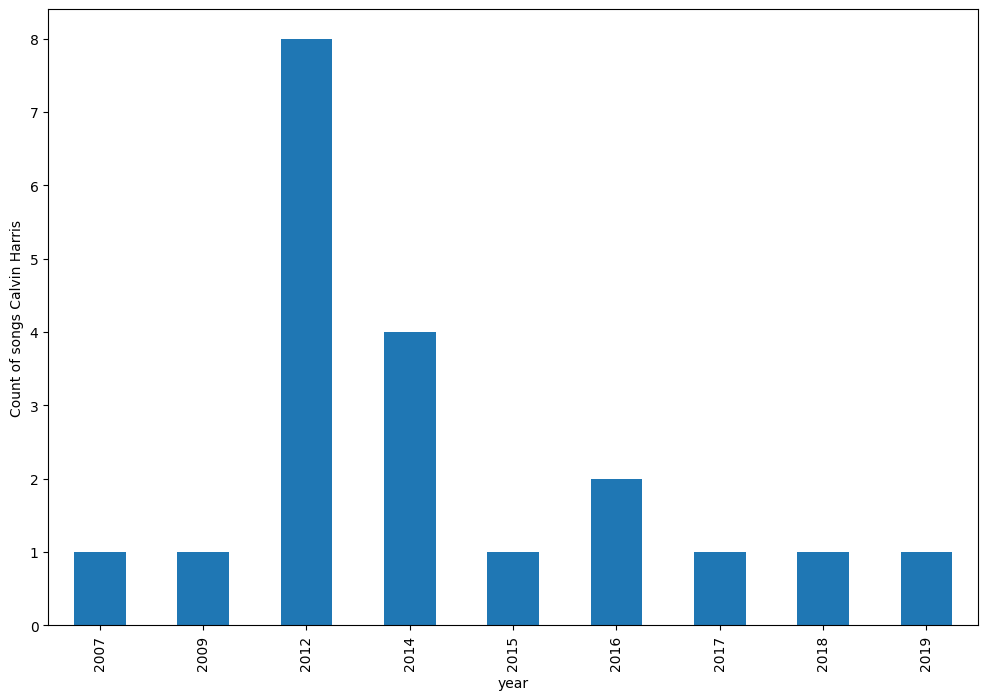

In [282]:
calvin_harris_songs_order_by_year.year.value_counts().sort_index().plot(kind="bar", xlabel="year",
                                                                        ylabel="Count of songs Calvin Harris",
                                                                        figsize=(12, 8))

#### Q6) <font color='blue'> TOTAL: (50 points)</font>
* Define a new datafame which contains the popularity, danceability, energy, year, tempo, song.  <font color='blue'> (5 points)</font>
* Use transform() to define a new column which represent percantage of popularity (pop%). <font color='blue'> (10 points)</font>
* Set the index of dataframe as year assign new data frame as song_rearranged<font color='blue'> (10 points)</font>
* Describe a new column as 'score' by considering mean of popularity, danceability, energy constants. <font color='blue'> (10 points)</font>
* Then, use groupby() in years and use apply function which returns the sorted values with respect to 'score' column? <font color='blue'> (15 points)</font>
* Display the songs having the first 4 best scores in 2009. Please be sure there is no duplication in the data! <font color='blue'> (10 points)</font>

In [320]:
DEFINE_COLUMN: list = ['song', 'year', 'danceability', 'tempo', 'energy', 'popularity']

new_df = songs[DEFINE_COLUMN]
new_df

,song,year,danceability,tempo,energy,popularity
0,Oops!...I Did It Again,2000,0.751,95.053,0.834,77
1,All The Small Things,1999,0.434,148.726,0.897,79
2,Breathe,1999,0.529,136.859,0.496,66
3,It's My Life,2000,0.551,119.992,0.913,78
4,Bye Bye Bye,2000,0.614,172.656,0.928,65
...,...,...,...,...,...,...
1995,Sucker,2019,0.842,137.958,0.734,79
1996,Cruel Summer,2019,0.552,169.994,0.702,78
1997,The Git Up,2019,0.847,97.984,0.678,69
1998,Dancing With A Stranger (with Normani),2019,0.741,102.998,0.520,75


In [321]:
new_df['%pop'] = songs.groupby("popularity")["popularity"].transform('mean')

/var/folders/bw/tgvmyyzj1lx_nl3bvvgnf3fh0000gn/T/ipykernel_7022/1889378551.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['%pop'] = songs.groupby("popularity")["popularity"].transform('mean')


In [322]:
new_df.set_index("year", inplace = True)

In [327]:
new_df['score'] = songs.groupby(['danceability', 'tempo', 'energy'])['popularity'].transform('mean')

/var/folders/bw/tgvmyyzj1lx_nl3bvvgnf3fh0000gn/T/ipykernel_7022/2847877436.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['score'] = songs.groupby(['danceability', 'tempo', 'energy'])['popularity'].transform('mean')


In [333]:
new_df.groupby(['score']).apply(
    lambda x: (x.groupby('year')
    .sum()
    .sort_values('score', ascending=False))
    .head(3)
)

/var/folders/bw/tgvmyyzj1lx_nl3bvvgnf3fh0000gn/T/ipykernel_7022/2474055611.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  lambda x: (x.groupby('year')
/var/folders/bw/tgvmyyzj1lx_nl3bvvgnf3fh0000gn/T/ipykernel_7022/2474055611.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  lambda x: (x.groupby('year')


,,danceability,tempo,energy,popularity,%pop,score
score,year,,,,,,
75.0,1998,0.727,81.125,0.445,49,49.0,75.0
85.0,1999,25.421,4662.790,28.060,2467,2467.0,3230.0


In [338]:
new_df.reset_index(inplace=True)

new_df[new_df['year'] == 2009]

,index,year,song,danceability,tempo,energy,popularity,%pop,score
344,344,2009,Be Faithful,0.649,101.129,0.713,49,49.0,NaN
817,817,2009,4 Minutes (feat. Justin Timberlake & Timbaland),0.753,113.029,0.931,71,71.0,NaN
878,878,2009,Hallelujah,0.177,182.571,0.425,63,63.0,NaN
900,900,2009,I Gotta Feeling,0.743,127.960,0.766,80,80.0,NaN
904,904,2009,Right Round,0.720,124.986,0.672,74,74.0,NaN
...,...,...,...,...,...,...,...,...,...
1085,1085,2009,BedRock,0.733,148.005,0.664,71,71.0,NaN
1090,1090,2009,Fireflies,0.512,180.114,0.662,78,78.0,NaN
1091,1091,2009,Empire State of Mind (Part II) Broken Down,0.484,92.923,0.368,71,71.0,NaN
1095,1095,2009,Live Like We're Dying,0.589,92.011,0.893,51,51.0,NaN
